In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
N_SAMPLES = 250
X, Y = datasets.make_blobs(n_samples=N_SAMPLES,n_features=2,centers=2,cluster_std=1.2,random_state=7)

In [3]:
DIV = round(80*N_SAMPLES/100)
X_TRAIN = X[:DIV]
X_TEST = X[DIV:]
Y_TRAIN = Y[:DIV]
Y_TEST = Y[DIV:]

Text(0.5, 1.0, 'Clasificacion aleatoria con 2 clases')

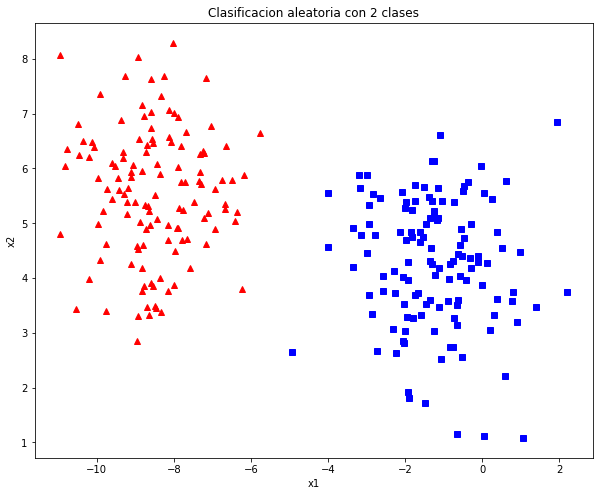

In [4]:
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][Y == 0], X[:, 1][Y == 0], 'r^')
plt.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], 'bs')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Clasificacion aleatoria con 2 clases')

In [5]:
def perceptron(X, Y, lr, epochs):
    # No de samples
    n = X.shape[1]

    # Inicializamos array de pesos con n elementos, mas un bias
    W = np.zeros((n+1,1))
    
    # Iteramos por cada epoch
    for epoch in range(epochs):
        # Iteramos por cada sample
        for idx, x_i in enumerate(X):
            
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)
            
            # Calc hipotesis.
            z = np.dot(x_i.T, W)
            y_hat = (1 / (1 + np.exp(-z)))
            
            # Actualizar pesos si hipotesis es incorrecta.
            if (np.squeeze(y_hat) != Y[idx]):
                W += lr*((Y[idx] - y_hat)*x_i)
    return W

In [6]:
W = perceptron(X_TRAIN, Y_TRAIN, 0.5, 100)

In [7]:
def calc_accuracy(X):
    correct_count = 0
    for i_sample, x_i in enumerate(X):
        x0 = x_i[1]
        x1 = x_i[0]
        z = (x0)*(W[0]) + (x1)*(W[1]) + W[2]
        y_pred = (1 / (1 + np.exp(-z)))
        if(round(y_pred[0]) == Y_TEST[i_sample]):
            correct_count += 1
    accuracy = correct_count*100/(i_sample+1)
    return accuracy

In [8]:
accuracy = calc_accuracy(X_TEST)
print(f"Accuracy del Modelo: {round(accuracy,2)}%")

Accuracy del Modelo: 96.0%


In [9]:
def plot_decision_boundary(X, W):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -W[1]/W[2]
    c = -W[0]/W[2]
    x2 = m*x1 + c
    
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "r^")
    plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptrón')
    plt.plot(x1, x2, 'g-')

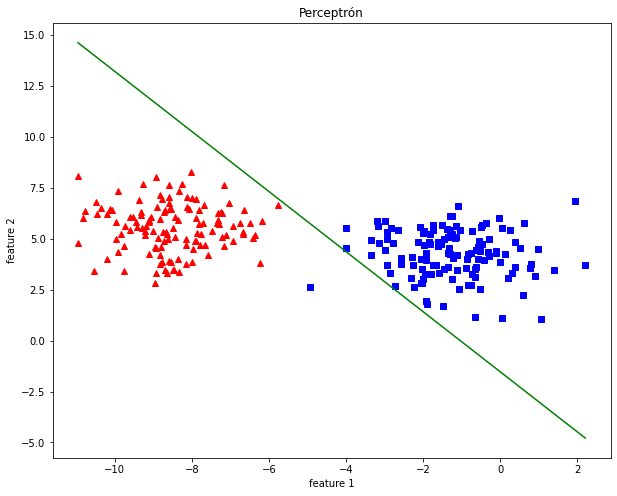

In [10]:
plot_decision_boundary(X, W)